In [39]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import torch

In [4]:
df = pd.read_csv("data/phishing_email.csv")

In [5]:
df.head()

text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
from string import punctuation
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation and word]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [316]:
import copy
processed_df = copy.deepcopy(df)

In [40]:
#processed_df["text_combined"] = processed_df["text_combined"].dropna().apply(preprocess)
processed_df = pd.read_csv("processed_data/processed_phish.csv")

In [ ]:
processed_df.isnull().sum()

In [322]:
processed_df = processed_df.dropna()

In [41]:
processed_df.isnull().sum()

combined_text    0
label            0
dtype: int64

In [344]:
#processed_df.to_csv("processed_data/processed_phish.csv", index=False)

In [13]:
tokens = []
for line in processed_df["text_combined"]:
    try:
        tokens.append(str(line).strip().split())
    except Exception as e:
        print(line)

flat_tokens = [x for xs in tokens for x in xs]

In [14]:
flat_tokens

['hpl',
 'nom',
 'may',
 'see',
 'attached',
 'file',
 'hplno',
 'xl',
 'hplno',
 'xl',
 'nom',
 'actual',
 'vols',
 'th',
 'forwarded',
 'sabrae',
 'zajac',
 'hou',
 'ect',
 'pm',
 'enron',
 'capital',
 'trade',
 'resource',
 'corp',
 'eileen',
 'ponton',
 'davilal',
 'txu',
 'com',
 'cstonel',
 'txu',
 'com',
 'mjones',
 'txu',
 'com',
 'hpl',
 'scheduling',
 'enron',
 'com',
 'liz',
 'bellamy',
 'enron',
 'com',
 'szajac',
 'enron',
 'com',
 'cc',
 'subject',
 'nom',
 'actual',
 'vols',
 'th',
 'agree',
 'nomination',
 'forwarded',
 'eileen',
 'ponton',
 'houston',
 'pefs',
 'pec',
 'charlie',
 'stone',
 'eileen',
 'ponton',
 'melissa',
 'jones',
 'com',
 'hpl',
 'scheduling',
 'enron',
 'com',
 'liz',
 'bellamy',
 'enron',
 'com',
 'szajac',
 'enron',
 'com',
 'subject',
 'nom',
 'actual',
 'vols',
 'th',
 'pm',
 'agree',
 'nominated',
 'volume',
 'record',
 'reflect',
 'following',
 'nom',
 'schedule',
 'rate',
 'eff',
 'hr',
 'hour',
 'beginning',
 'hr',
 'rate',
 'eff',
 'hr',
 

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
processed_df.head()

combined_text  label
0    hpl nom may see attached file hplno xl hplno xl      0
1  nom actual vols th forwarded sabrae zajac hou ...      0
2  enron actuals march april estimated actuals ma...      0
3    hpl nom may see attached file hplno xl hplno xl      0
4   hpl nom june see attached file hplno xl hplno xl      0

In [17]:
X = processed_df['text_combined']
y = processed_df['label']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('text_combined', TfidfVectorizer(stop_words='english', max_features=5000), 'text_combined'),  # TF-IDF for text
    ],
    remainder='passthrough'
)


In [19]:
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
torch.cuda.is_available()


True

In [45]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")

Running on the GPU
Using device = cuda:0


In [23]:
# from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', verbose=10)
# print("Cross-Validation scores:", cv_scores)
# print("Average Cross-Validation:", np.mean(cv_scores))

# param_grid = {
#     'classifier__C': [0.1, 1, 10],
#     'classifier__solver': ['lbfgs', 'liblinear']
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=4, verbose=10)
# grid_search.fit(X_train, y_train)
# print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# accuracy = np.mean(y_pred == y_test)
# print("Test Accuracy:", accuracy)

In [24]:
# import joblib
# joblib.dump(best_model, 'filename.pkl', compress=1)

In [46]:
class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNNet, self).__init__()

        self.rnn = nn.RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, line_tensor):
        rnn_out, hidden = self.rnn(line_tensor)
        output = self.h2o(hidden)
        output = self.softmax(output)  # Apply softmax on the second dimension (output_size)

        return output

In [47]:
class TrainingConfig:
    n_hidden = 128
    train_batch_size = 64
    eval_batch_size = 64
    num_epochs = 3
    learning_rate = 1e-4
    lr_warmup_steps = 500

    seed = 0

In [27]:
import string
import unicodedata

allowed_characters = string.ascii_letters + " .,;'"
n_letters = len(allowed_characters)
allowed_characters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [28]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return allowed_characters.find(letter)

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [29]:
# processed_df.to_csv("processed_data/processed_phish.csv", index=False)

In [48]:
vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(X_train)

# #Vectorize test texts.
# X_test = vectorizer.transform(X_test)

In [31]:
X_train.shape

(57739,)

In [32]:
X_train[:2]

64691    qydlqcwsiacfymissuesapacheorg httpsissuesapach...
14942    cheap online pill chromate obsessive consensus...
Name: text_combined, dtype: object

In [33]:
X_train = vectorizer.fit_transform([X_train[0]])
X_train = X_train.todense()
X_train = torch.tensor(X_train)

In [34]:
X_train.size(-1)

8

In [124]:
from io import open
import glob
import os
import time
import re

from torch.utils.data import Dataset
import torch.nn.functional as F

class PhishDataset(Dataset):

    def __init__(self, data_dir):
        self.data_dir = data_dir #for provenance of the dataset
        self.load_time = time.localtime #for provenance of the dataset
        self.count = 0
        self.num_workers = 4
        self.data = []
        self.target_len = 24074
        #self.vocab = vocab
        #self.vocab_siz_tensors = []
        self.labels = []
        #self.labels_tensors = []

        #read all the ``.csv`` files in the specified directory
        text_files = glob.glob(os.path.join(data_dir, '*.csv'))
        for filename in text_files:
            lines = open(filename, encoding='utf-8').read().strip().replace(',', '').split('\n')
            for line in lines:
                self.data.append(line[:-1])
                #self.data_tensors.append(lineToTensor(line))
                self.labels.append(line[-1])
                self.count += 1
                print(f"{self.count} lines processed out of {len(lines)}")
            print(line[:-1], line[-1])

        #Cache the tensor representation of the labels
        #for idx in range(len(self.labels)):
        #    temp_tensor = torch.tensor([self.labels_uniq.index(self.labels[idx])], dtype=torch.long)
        #    self.labels_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    # def letterToIndex(self, letter):
    #     return self.vocab.getstoi().find(letter)

    # def lineToTensor(self, line):
    #     tensor = torch.zeros(len(line), 1, self.target_len)
    #     for li, letter in enumerate(line):
    #         tensor[li][0][letterToIndex(letter)] = 1
    #     return tensor
    
    def __transform_data__(self, idx, type):
        if type == "data":
            #data = [self.vocab[token] for token in self.data[idx]]
            data = vectorizer.fit_transform([self.data[idx]])
            data = data.todense()
            data = torch.tensor(data).float()
            data = F.pad(data, (self.target_len - data.size(1), 0))
            #data = self.lineToTensor(self.data[idx])
            return data
        if type == "label":
            if self.labels[idx] == '0':
                label = 0
            elif self.labels[idx] == '1':
                label = 1
            label = torch.tensor([label], dtype=torch.long)
            #label = self.lineToTensor(self.labels[idx])
            return label
        return None

    def __getitem__(self, idx):
        data_item = self.__transform_data__(idx, "data")
        data_label = self.__transform_data__(idx, "label")
        data = self.data[idx]
        label = self.labels[idx]
        #data_tensor = self.data_tensors[idx]
        #label_tensor = self.labels_tensors[idx]

        return data_item, data_label, data, label

In [125]:
# unk_token = '<unk>'
# vocab.set_default_index(vocab[unk_token])

In [126]:
data = PhishDataset("processed_data/")
print(f"loaded {len(data)} items of data")
print(f"example = {data[1]}")

1 lines processed out of 82484
2 lines processed out of 82484
3 lines processed out of 82484
4 lines processed out of 82484
5 lines processed out of 82484
6 lines processed out of 82484
7 lines processed out of 82484
8 lines processed out of 82484
9 lines processed out of 82484
10 lines processed out of 82484
11 lines processed out of 82484
12 lines processed out of 82484
13 lines processed out of 82484
14 lines processed out of 82484
15 lines processed out of 82484
16 lines processed out of 82484
17 lines processed out of 82484
18 lines processed out of 82484
19 lines processed out of 82484
20 lines processed out of 82484
21 lines processed out of 82484
22 lines processed out of 82484
23 lines processed out of 82484
24 lines processed out of 82484
25 lines processed out of 82484
26 lines processed out of 82484
27 lines processed out of 82484
28 lines processed out of 82484
29 lines processed out of 82484
30 lines processed out of 82484
31 lines processed out of 82484
32 lines processe

In [127]:
train_set, test_set = torch.utils.data.random_split(data, [.85, .15], generator=torch.Generator(device=device).manual_seed(1))

print(f"train examples = {len(train_set)}, validation examples = {len(test_set)}")

train examples = 70112, validation examples = 12372


In [54]:
max = 0
f = open("processed_data/processed_phish.csv", encoding='utf-8').read().strip().replace(',', '')
f = re.split('[01]', f)
for line in range(len(f) - 1):
    length = len(f[line])
    if length > max:
        max = length
        idx = line
    print(f"on line {line}")
print(max, idx)

on line 0
on line 1
on line 2
on line 3
on line 4
on line 5
on line 6
on line 7
on line 8
on line 9
on line 10
on line 11
on line 12
on line 13
on line 14
on line 15
on line 16
on line 17
on line 18
on line 19
on line 20
on line 21
on line 22
on line 23
on line 24
on line 25
on line 26
on line 27
on line 28
on line 29
on line 30
on line 31
on line 32
on line 33
on line 34
on line 35
on line 36
on line 37
on line 38
on line 39
on line 40
on line 41
on line 42
on line 43
on line 44
on line 45
on line 46
on line 47
on line 48
on line 49
on line 50
on line 51
on line 52
on line 53
on line 54
on line 55
on line 56
on line 57
on line 58
on line 59
on line 60
on line 61
on line 62
on line 63
on line 64
on line 65
on line 66
on line 67
on line 68
on line 69
on line 70
on line 71
on line 72
on line 73
on line 74
on line 75
on line 76
on line 77
on line 78
on line 79
on line 80
on line 81
on line 82
on line 83
on line 84
on line 85
on line 86
on line 87
on line 88
on line 89
on line 90
on line 9

In [50]:
maxline = vectorizer.fit_transform([f[81453]])
maxline = maxline.todense()
maxline = torch.tensor(maxline).float()
maxline.size()

torch.Size([1, 24074])

In [44]:
# import scipy
# X_train = torch.tensor(X_train).float()
# X_test = torch.tensor(X_test).float()
# y_train = torch.tensor(y_train.values)
# y_test = torch.tensor(y_test.values)

In [55]:
rnn = RNNNet(24074, TrainingConfig.n_hidden, len(processed_df.label.unique()))
rnn

RNNNet(
  (rnn): RNN(24074, 128)
  (h2o): Linear(in_features=128, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [46]:
import time

In [47]:
# import random
# import numpy as np
# train_losses = []
# test_losses = []
# test_accuracies = []
# def train(rnn, X_train, y_train, n_batch_size=TrainingConfig.train_batch_size, n_epoch=TrainingConfig.num_epochs, report_every=50, learning_rate=TrainingConfig.learning_rate, criterion=nn.CrossEntropyLoss()):
#     current_loss = 0
#     losses = []
#     rnn.train()
#     optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

#     start = time.time()
#     print(f"training on data set with n = {len(processed_df['label'])}")

#     for iter in range(1, n_epoch + 1):
#         rnn.zero_grad()

#         output = rnn.forward(X_train)
#         loss = criterion(output, y_train)
#         train_loss = loss.item()
#         train_losses.append(train_loss)
#         # optimize parameters
#         loss.backward()
#         nn.utils.clip_grad_norm_(rnn.parameters(), 3)
#         optimizer.step()
#         optimizer.zero_grad()

#     # Turn off gradients for validation, saves memory and computations
#         with torch.no_grad():
#             rnn.eval()
#             log_ps = rnn(X_test)
#             test_loss = criterion(log_ps, y_test)
#             test_losses.append(test_loss)

#             ps = torch.exp(log_ps)
#             top_p, top_class = ps.topk(1, dim=1)
#             equals = top_class == y_test.view(*top_class.shape)
#             test_accuracy = torch.mean(equals.float())
#             test_accuracies.append(test_accuracy)

#         if iter % report_every == 0:
#             print(f"{iter} ({iter / n_epoch:.0%}): \t average batch loss = {train_losses[-1]}")
#         current_loss = 0

#     return all_losses



In [56]:
target_len = 24074
def transform_data(idx, type):
    if type == "data":
        #data = [self.vocab[token] for token in self.data[idx]]
        data = vectorizer.fit_transform([processed_df["text_combined"].iloc[idx]])
        data = data.todense()
        data = torch.tensor(data).float()
        data = F.pad(data, (target_len - data.size(1), 0))
        #data = self.lineToTensor(self.data[idx])
        return data
    if type == "label":
        label = torch.tensor([processed_df["label"].iloc[idx]], dtype=torch.long)
        #label = self.lineToTensor(self.labels[idx])
        return label
    return None

In [439]:
import random
import numpy as np

def train_on_csv(rnn, training_data, n_epoch=TrainingConfig.num_epochs, n_batch_size=TrainingConfig.train_batch_size, report_every = 50, learning_rate=TrainingConfig.learning_rate, criterion = nn.CrossEntropyLoss()):
    """
    Learn on a batch of training_data for a specified number of iterations and reporting thresholds
    """
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []
    rnn.train()
    optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"training on data set with n = {len(training_data)}")

    for iter in range(1, n_epoch + 1):
        rnn.zero_grad() # clear the gradients

        # create some minibatches
        # we cannot use dataloaders because each of our lines is a different length
        batches = list(range(len(training_data)))
        random.shuffle(batches)
        batches = np.array_split(batches, len(batches) //n_batch_size )

        for idx, batch in enumerate(batches):
            batch_loss = 0
            for i in batch: #for each example in this batch
                text_tensor = transform_data(i, "data")
                label_tensor = transform_data(i, "label")
                output = rnn.forward(text_tensor)
                loss = criterion(output, label_tensor)
                batch_loss += loss

            # optimize parameters
            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += batch_loss.item() / len(batch)

        all_losses.append(current_loss / len(batches) )
        if iter % report_every == 0:
            print(f"{iter} ({iter / n_epoch:.0%}): \t average batch loss = {all_losses[-1]}")
        current_loss = 0

    return all_losses

In [84]:
import convert
import sqlite3
import pandas as pd
csv_file = "processed_data/processed_phish.csv"

df_from_csv = pd.read_csv(csv_file)

generated_table_name = convert.get_table_name(csv_file)
print(generated_table_name)

conn = sqlite3.connect(f'{generated_table_name}.sqlite')
cur = conn.cursor()

df_from_sql = pd.read_sql_query(f'select * from {generated_table_name}', con = conn)
print(df_from_sql)


processedphish
                                           combined_text  label
0        hpl nom may see attached file hplno xl hplno xl      0
1      nom actual vols th forwarded sabrae zajac hou ...      0
2      enron actuals march april estimated actuals ma...      0
3        hpl nom may see attached file hplno xl hplno xl      0
4       hpl nom june see attached file hplno xl hplno xl      0
...                                                  ...    ...
82478  info advantageapartmentscom infoadvantageapart...      1
82479  monkeyorg helpdeskmonkeyorg monkeyorg hi josep...      1
82480  help center infohelpcentercozainfohelpcenterco...      1
82481  metamask infosofamekarcom verify metamask wall...      1
82482  fastway infofastwaycozainfofastwaycozainfofast...      1

[82483 rows x 2 columns]


In [26]:
# cur.execute(f'create index idx on {generated_table_name} (combined_text);')
# conn.commit()

OperationalError: index idx already exists

In [107]:
print(df_from_sql)

                                           combined_text  label
0        hpl nom may see attached file hplno xl hplno xl      0
1      nom actual vols th forwarded sabrae zajac hou ...      0
2      enron actuals march april estimated actuals ma...      0
3        hpl nom may see attached file hplno xl hplno xl      0
4       hpl nom june see attached file hplno xl hplno xl      0
...                                                  ...    ...
82478  info advantageapartmentscom infoadvantageapart...      1
82479  monkeyorg helpdeskmonkeyorg monkeyorg hi josep...      1
82480  help center infohelpcentercozainfohelpcenterco...      1
82481  metamask infosofamekarcom verify metamask wall...      1
82482  fastway infofastwaycozainfofastwaycozainfofast...      1

[82483 rows x 2 columns]


In [85]:
# def get_row(table, idx):
#     cur.execute(f'select * from {table} where rowid = {idx}')
#     row = cur.fetchall()
#     return row

# idx = 1
# row = get_row(generated_table_name, idx)
# row

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_from_sql["combined_text"], df_from_sql["label"], test_size=0.15, random_state=1)

print(f"train examples = {len(X_train)}, val examples = {len(X_test)}")

train examples = 70110, val examples = 12373


In [137]:
target_len = 24074
def transform_sql_data(idx, type, input):
    if type == "data":
        #data = [self.vocab[token] for token in self.data[idx]]
        data = vectorizer.fit_transform([input])
        data = data.todense()
        data = torch.tensor(data).float()
        data = F.pad(data, (target_len - data.size(1), 0))
        #data = self.lineToTensor(self.data[idx])
        return data
    if type == "label":
        label = torch.tensor([input], dtype=torch.long)
        #label = self.lineToTensor(self.labels[idx])
        return label
    return None

In [169]:
import random
import numpy as np
from tqdm import tqdm

def train_on_sql(rnn, X_train, y_train, n_epoch=TrainingConfig.num_epochs, n_batch_size=TrainingConfig.train_batch_size, report_every = 50, learning_rate=TrainingConfig.learning_rate, criterion = nn.CrossEntropyLoss()):
    """
    Learn on a batch of training_data for a specified number of iterations and reporting thresholds
    """
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []
    rnn.train()
    optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"training on data set with n = {len(X_train)}")

    for iter in range(1, n_epoch + 1):
        progress_bar = tqdm(total=len(X_train), miniters=500)
        progress_bar.set_description(f"Epoch {iter}")

        rnn.zero_grad() # clear the gradients

        # create some minibatches
        # we cannot use dataloaders because each of our lines is a different length
        batches = list(range(len(X_train)))
        random.shuffle(batches)

        for idx in range(len(batches)):
            text, label = X_train.iloc[idx], y_train.iloc[idx]
            text_tensor = transform_sql_data(idx, "data", text)
            label_tensor = transform_sql_data(idx, "label", label)
            output = rnn.forward(text_tensor)
            loss = criterion(output, label_tensor)

            # optimize parameters
            loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += loss.item()
        
            progress_bar.update(1)
            logs = {"loss": loss.detach().item()}
            progress_bar.set_postfix(**logs)

        all_losses.append(current_loss / len(batches) )
        # if iter % report_every == 0:
        #     print(f"{iter} ({iter / n_epoch:.0%}): \t average loss = {all_losses[-1]}")
        current_loss = 0

    return all_losses

In [170]:
start = time.time()
all_losses = train_on_sql(rnn, X_train, y_train, report_every=50)
end = time.time()
print(f"training took {end-start}s")

Epoch 3: 100%|██████████| 70110/70110 [11:08<00:00, 104.93it/s, loss=0.454]   

training took 2156.1211886405945s


In [171]:
torch.save(rnn.state_dict(), 'phish_weights.pth')

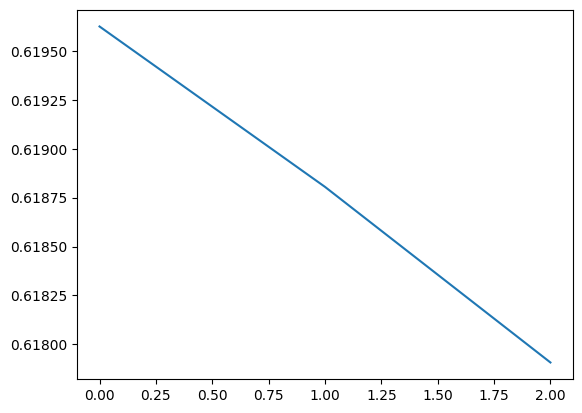

In [172]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

In [173]:
def label_from_output(output, output_labels):
    top_n, top_i = output.topk(1)
    label_i = top_i[0].item()
    return output_labels[label_i], label_i

In [ ]:
def evaluate(rnn, X_test, y_test, classes):
    confusion = torch.zeros(len(classes), len(classes))

    rnn.eval() #set to eval mode
    with torch.no_grad(): # do not record the gradients during eval phase
        for i in range(len(X_test)):
            text, label = X_test.iloc[i], y_test.iloc[i]
            output = rnn(transform_sql_data(i, "data", text))
            guess, guess_i = label_from_output(output, classes)
            label_i = classes.index(label)
            confusion[label_i][guess_i] += 1

    # Normalize by dividing every row by its sum
    for i in range(len(classes)):
        denom = confusion[i].sum()
        if denom > 0:
            confusion[i] = confusion[i] / denom

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.cpu().numpy()) #numpy uses cpu here so we need to use a cpu version
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)
    ax.set_yticks(np.arange(len(classes)), labels=classes)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # sphinx_gallery_thumbnail_number = 2
    plt.show()



evaluate(rnn, X_test, y_test, classes=alldata.labels_uniq)